In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
import os

In [31]:
plt.style.use(['science', 'notebook', 'grid'])

In [41]:
#loading the datafiles
master_dir = 'C:\\Users\\paudy\\Dropbox (ASU)\\Prabhat Paudyal PhD\\abstracts and papers\\data_paper\\BottomBoundary_E_100000000\\DropHeight_0'

#storing all the files in individual dataframes
df = {}

#loop through the range of file numbers
for i in range(60, 86):
    file_name = f'DEMdemo_forces_00{i}.csv'

    #joining the file paths
    file_path = os.path.join(master_dir, file_name)

    #read the csv files into dataframes and store it in a directory
    df[file_name] = pd.read_csv(file_path)

In [42]:
#cleaning the dataframes
cleaned_df = {}

#Loop through all dataframes in the dictionary
for file_name, datfr in df.items():
    filtered_df = datfr[(datfr['point_x'].between(-0.003,0.003)) & (datfr['point_y'].between(-0.003, 0.003))]

    #new dictionary
    cleaned_df[file_name] = filtered_df

cleaned_df

{'DEMdemo_forces_0060.csv':      point_x   point_y       point_z   force_x   force_y   force_z
 48 -0.001753 -0.002887 -1.047510e-06  0.002806 -0.000042 -0.005784
 57 -0.001251 -0.000953 -1.953450e-07  0.000225  0.000059 -0.000465
 58  0.000793 -0.000947 -8.405190e-08  0.000003  0.000002 -0.000125
 59  0.002800 -0.001063 -7.462220e-07  0.000797  0.000492 -0.003478
 66 -0.002258  0.000786 -3.681050e-07  0.000247  0.000546 -0.001201
 67 -0.000259  0.000782 -5.692710e-07  0.000763  0.000178 -0.002316
 68  0.001739  0.000816 -3.658350e-07  0.000447  0.000067 -0.001194
 80  0.002955  0.002542 -1.776380e-06  0.000654  0.004494 -0.012774,
 'DEMdemo_forces_0061.csv':      point_x   point_y       point_z   force_x   force_y   force_z
 47 -0.001753 -0.002888 -1.005830e-06  0.002686 -0.000036 -0.005441
 56 -0.001252 -0.000953 -1.968000e-07  0.000182  0.000149 -0.000470
 57  0.000793 -0.000947 -9.289950e-08  0.000011  0.000006 -0.000148
 58  0.002799 -0.001063 -7.667110e-07  0.001080  0.000856 -0.

In [43]:
#number of points in each df
for file_name, df in cleaned_df.items():
    row_count = df.shape[0]
    print(f'{file_name}: {row_count} rows')

DEMdemo_forces_0060.csv: 8 rows
DEMdemo_forces_0061.csv: 8 rows
DEMdemo_forces_0062.csv: 8 rows
DEMdemo_forces_0063.csv: 8 rows
DEMdemo_forces_0064.csv: 8 rows
DEMdemo_forces_0065.csv: 8 rows
DEMdemo_forces_0066.csv: 8 rows
DEMdemo_forces_0067.csv: 8 rows
DEMdemo_forces_0068.csv: 8 rows
DEMdemo_forces_0069.csv: 8 rows
DEMdemo_forces_0070.csv: 8 rows
DEMdemo_forces_0071.csv: 8 rows
DEMdemo_forces_0072.csv: 8 rows
DEMdemo_forces_0073.csv: 8 rows
DEMdemo_forces_0074.csv: 8 rows
DEMdemo_forces_0075.csv: 8 rows
DEMdemo_forces_0076.csv: 8 rows
DEMdemo_forces_0077.csv: 8 rows
DEMdemo_forces_0078.csv: 8 rows
DEMdemo_forces_0079.csv: 8 rows
DEMdemo_forces_0080.csv: 8 rows
DEMdemo_forces_0081.csv: 8 rows
DEMdemo_forces_0082.csv: 8 rows
DEMdemo_forces_0083.csv: 8 rows
DEMdemo_forces_0084.csv: 8 rows
DEMdemo_forces_0085.csv: 8 rows


In [44]:
#arranging the points in ascending order by x_coordinates
for file_name, df in cleaned_df.items():
    sorted_df = df.sort_values(by='point_x', ascending=True)

    cleaned_df[file_name] = sorted_df

cleaned_df

{'DEMdemo_forces_0060.csv':      point_x   point_y       point_z   force_x   force_y   force_z
 66 -0.002258  0.000786 -3.681050e-07  0.000247  0.000546 -0.001201
 48 -0.001753 -0.002887 -1.047510e-06  0.002806 -0.000042 -0.005784
 57 -0.001251 -0.000953 -1.953450e-07  0.000225  0.000059 -0.000465
 67 -0.000259  0.000782 -5.692710e-07  0.000763  0.000178 -0.002316
 58  0.000793 -0.000947 -8.405190e-08  0.000003  0.000002 -0.000125
 68  0.001739  0.000816 -3.658350e-07  0.000447  0.000067 -0.001194
 59  0.002800 -0.001063 -7.462220e-07  0.000797  0.000492 -0.003478
 80  0.002955  0.002542 -1.776380e-06  0.000654  0.004494 -0.012774,
 'DEMdemo_forces_0061.csv':      point_x   point_y       point_z   force_x   force_y   force_z
 65 -0.002259  0.000786 -2.707240e-07  0.000280  0.000256 -0.000758
 47 -0.001753 -0.002888 -1.005830e-06  0.002686 -0.000036 -0.005441
 56 -0.001252 -0.000953 -1.968000e-07  0.000182  0.000149 -0.000470
 66 -0.000260  0.000781 -5.727630e-07  0.001132  0.000235 -0.

In [45]:
#tracking the displacement of each point over time 
num_points = len(next(iter(cleaned_df.values())))

# Initialize a list of lists to store the z positions
z_positions = [[] for _ in range(num_points)]

# Loop through each cleaned dataframe
for df in cleaned_df.values():
    # Loop through each point (row) in the dataframe
    for idx in range(num_points):
        # Append the z position of the current point to the corresponding list
        z_positions[idx].append(df.iloc[idx]['point_z'])

relative_z_positions = relative_z_positions = [[] for _ in range(num_points)]

# Calculate the relative z positions
for i, z_list in enumerate(z_positions):
    initial_z = z_list[0]  # Initial z position of the point
    relative_z_list = [z - initial_z for z in z_list]  # Calculate relative positions
    relative_z_positions[i] = relative_z_list

# Display the relative z positions lists
for i, relative_z_list in enumerate(relative_z_positions):
    print(f"Point {i}: {relative_z_list}")

Point 0: [0.0, 9.738100000000002e-08, 7.881299999999998e-08, -7.683399999999999e-08, -1.4226e-07, -1.4598500000000002e-07, -3.259999999999991e-09, 4.248999999999974e-09, -5.512300000000001e-08, 2.45345e-07, 3.522724e-07, 2.863814e-07, 2.86265e-07, 2.36323e-07, 2.689773e-07, 2.31899e-07, 2.17056e-07, 8.521600000000001e-08, 4.237500000000001e-08, 3.27476e-07, 2.49885e-07, 2.30269e-07, 2.05589e-07, 2.00467e-07, 2.3318e-07, 2.58966e-07]
Point 1: [0.0, 4.168000000000004e-08, 2.73814e-07, 6.839900000000003e-08, 2.1720000000000065e-08, -2.1179999999999982e-08, 3.842000000000005e-08, -4.2840000000000085e-08, -3.7660000000000034e-08, -3.427999999999991e-08, 1.5309999999999943e-08, -8.550000000000113e-09, -1.6410000000000026e-08, -6.630000000000053e-09, -2.2410000000000053e-08, -3.0669999999999996e-08, -2.9270000000000103e-08, -1.1809999999999998e-07, -1.0191999999999995e-07, 1.776000000000002e-08, 3.190000000000007e-08, -1.583000000000011e-08, -1.6410000000000026e-08, -3.736000000000001e-08, -5

In [46]:
#tracking the contact force of each point over time
num_points = len(next(iter(cleaned_df.values())))

# Initialize a list of lists to store the z positions
contact_forces = [[] for _ in range(num_points)]

# Loop through each cleaned dataframe
for df in cleaned_df.values():
    # Loop through each point (row) in the dataframe
    for idx in range(num_points):
        # Append the z position of the current point to the corresponding list
        contact_forces[idx].append(df.iloc[idx]['force_z'])

for i, force in enumerate(contact_forces):
    print(f"Point {i}: {force}")

Point 0: [-0.00120067, -0.000758279, -0.000834805, -0.00160042, -0.00196636, -0.00198558, -0.00122063, -0.00118472, -0.0014863, -0.000230811, -1.01468e-05, -0.000124038, -0.000124372, -0.000256478, -0.000163286, -0.000270025, -0.000315795, -0.00080633, -0.00100939, -4.35547e-05, -0.000216844, -0.000273093, -0.000347047, -0.000368028, -0.000263573, -0.000191357]
Point 1: [-0.00578447, -0.00544064, -0.00366625, -0.00522537, -0.00560425, -0.00595702, -0.0054682, -0.00614298, -0.00609795, -0.00606992, -0.00565886, -0.00585776, -0.00591673, -0.00583767, -0.00596642, -0.00603341, -0.00602723, -0.00678421, -0.00664914, -0.00563806, -0.00551791, -0.00591283, -0.00594976, -0.00609404, -0.00620263, -0.00629011]
Point 2: [-0.000465075, -0.000469933, -0.000308837, -0.000374026, -0.000302133, -0.000383676, -0.000300592, -0.000123207, -0.000225313, -0.000307523, -0.000811699, -0.00088913, -0.000556592, -0.000470952, -0.000457795, -0.000350231, -0.000420742, -0.000208622, -0.000131592, -0.000205078, 

In [69]:
#calculating the real world time
frame_rate = 24

start_frame = 60
end_frame = 85

times = [(frame-start_frame) / frame_rate for frame in range(start_frame, end_frame+1)]
times

[0.0,
 0.041666666666666664,
 0.08333333333333333,
 0.125,
 0.16666666666666666,
 0.20833333333333334,
 0.25,
 0.2916666666666667,
 0.3333333333333333,
 0.375,
 0.4166666666666667,
 0.4583333333333333,
 0.5,
 0.5416666666666666,
 0.5833333333333334,
 0.625,
 0.6666666666666666,
 0.7083333333333334,
 0.75,
 0.7916666666666666,
 0.8333333333333334,
 0.875,
 0.9166666666666666,
 0.9583333333333334,
 1.0,
 1.0416666666666667]

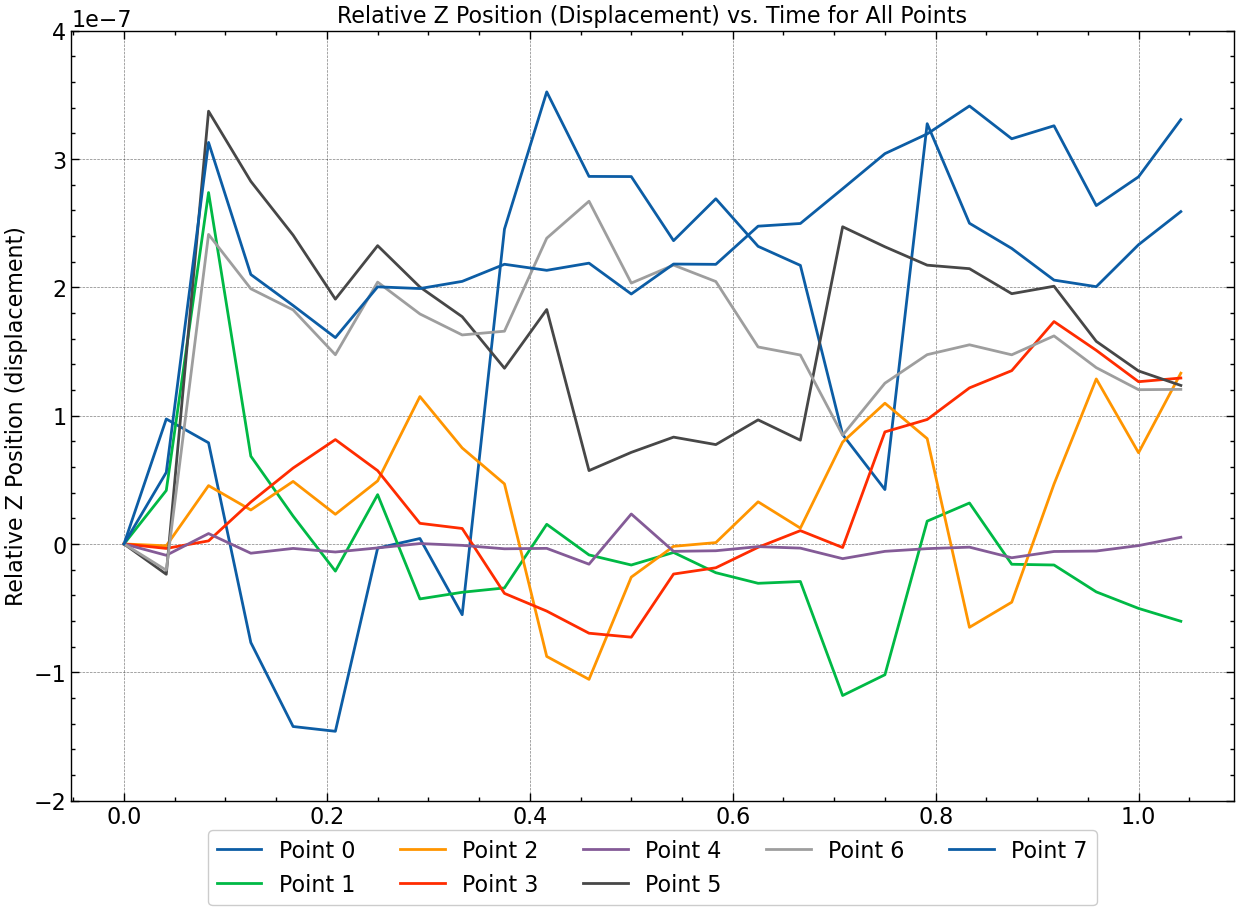

In [73]:
# Create a figure and main axis
fig, ax_main = plt.subplots(figsize=(15, 10))

# Plot the relative z positions (displacement) vs. time for all points
for i, relative_z_list in enumerate(relative_z_positions):
    ax_main.plot(times, relative_z_list, label=f'Point {i}')

# Inflate the y-axis extents to provide space for the legend
ax_main.set_ylim([-2e-7, 4e-7])

# Set labels and title
ax_main.set_xlabel('Time (seconds)')
ax_main.set_ylabel('Relative Z Position (displacement)')
ax_main.set_title('Relative Z Position (Displacement) vs. Time for All Points')
ax_main.grid(True)

# Place the legend within the artificially inflated space
ax_main.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Show the plot
plt.show()

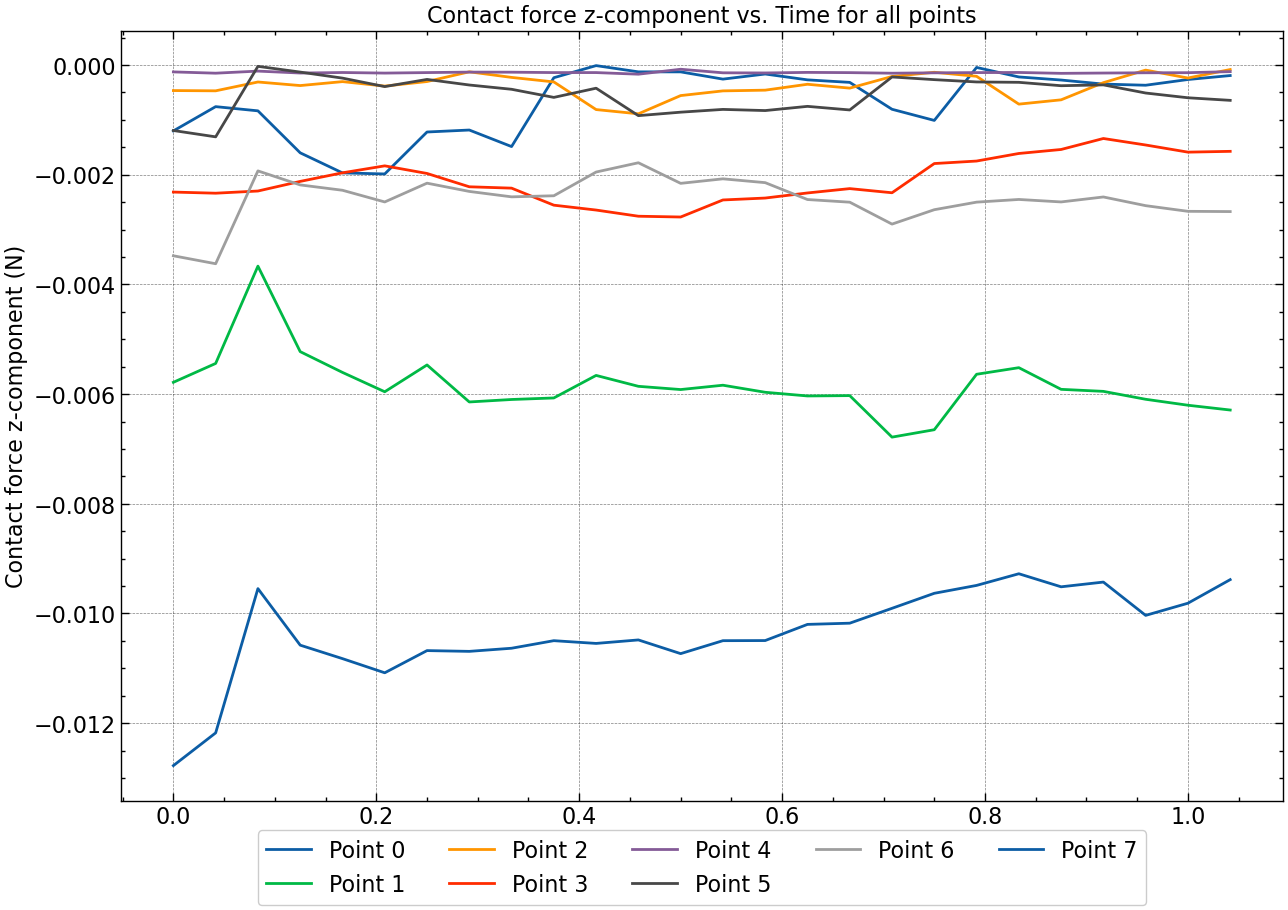

In [74]:
# Plot the relative z positions (displacement) vs. time for all points
# Create a figure and main axis
fig, ax_main = plt.subplots(figsize=(15, 10))

# Plot the relative z positions (displacement) vs. time for all points
for i, j in enumerate(contact_forces):
    ax_main.plot(times, j, label=f'Point {i}')

# Inflate the y-axis extents to provide space for the legend
#ax_main.set_ylim([-2e-7, 4e-7])

# Set labels and title
ax_main.set_xlabel('Time (seconds)')
ax_main.set_ylabel('Contact force z-component (N)')
ax_main.set_title('Contact force z-component vs. Time for all points')
ax_main.grid(True)

# Place the legend within the artificially inflated space
ax_main.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Show the plot
plt.show()